In [25]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
import tensorflow as tf

In [26]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [27]:
!unzip /content/drive/MyDrive/kagglecatsanddogs_5340.zip -d /dados

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /dados/PetImages/Dog/5500.jpg  
  inflating: /dados/PetImages/Dog/5501.jpg  
  inflating: /dados/PetImages/Dog/5502.jpg  
  inflating: /dados/PetImages/Dog/5503.jpg  
  inflating: /dados/PetImages/Dog/5504.jpg  
  inflating: /dados/PetImages/Dog/5505.jpg  
  inflating: /dados/PetImages/Dog/5506.jpg  
  inflating: /dados/PetImages/Dog/5507.jpg  
  inflating: /dados/PetImages/Dog/5508.jpg  
  inflating: /dados/PetImages/Dog/5509.jpg  
  inflating: /dados/PetImages/Dog/551.jpg  
  inflating: /dados/PetImages/Dog/5510.jpg  
  inflating: /dados/PetImages/Dog/5511.jpg  
  inflating: /dados/PetImages/Dog/5512.jpg  
  inflating: /dados/PetImages/Dog/5513.jpg  
  inflating: /dados/PetImages/Dog/5514.jpg  
  inflating: /dados/PetImages/Dog/5515.jpg  
  inflating: /dados/PetImages/Dog/5516.jpg  
  inflating: /dados/PetImages/Dog/5517.jpg  
  inflating: /dados/PetImages/Dog/5518.jpg  
  inflating: /dados/PetImages/Dog/5519.jpg

In [28]:
root = '/dados/PetImages'
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]

print(categories)

['/dados/PetImages/Dog', '/dados/PetImages/Cat']


In [29]:
def get_image(path):
    img = tf.keras.utils.load_img(path, target_size=(224, 224))
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

In [ ]:
#Remove the Thumbs.db file in the database
os.remove('/dados/PetImages/Cat/Thumbs.db')
os.remove('/dados/PetImages/Dog/Thumbs.db')

In [ ]:
#Since there was too many images, we are going to remove most of them and use just the first 100 images
for i in range(100, 12499):
  os.remove(f'/dados/PetImages/Cat/{i}.jpg')
  os.remove(f'/dados/PetImages/Dog/{i}.jpg')

In [34]:
data = []
for c, category in enumerate(categories):
    images = [os.path.join(dp, f) for dp, dn, filenames 
              in os.walk(category) for f in filenames 
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

# count the number of classes
num_classes = len(categories)

In [35]:
#Shuffle the data
random.shuffle(data)

In [36]:
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [37]:
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]


In [38]:
# normalize data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# convert labels to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(31, 2)


In [39]:
# summary
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 202 images from 2 categories
train / validation / test split: 141, 30, 31
training data shape:  (141, 224, 224, 3)
training labels shape:  (141, 2)


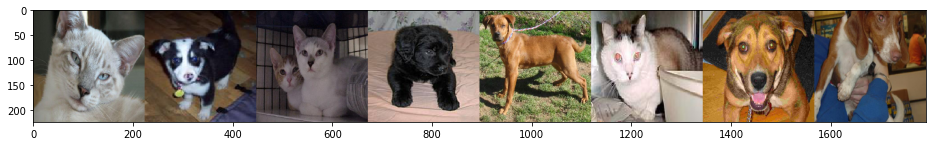

In [40]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [tf.keras.utils.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [41]:

vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()



553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [42]:


# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)



In [43]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
history2 = model_new.fit(x_train, y_train, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(x_val, y_val))

Epoch 1/10
2/2 [==============================] - 97s 23s/step - loss: 1.2633 - accuracy: 0.4752 - val_loss: 0.9586 - val_accuracy: 0.4667
Epoch 2/10
2/2 [==============================] - 96s 23s/step - loss: 0.8918 - accuracy: 0.4965 - val_loss: 0.7744 - val_accuracy: 0.5333
Epoch 3/10
2/2 [==============================] - 89s 22s/step - loss: 0.8853 - accuracy: 0.4965 - val_loss: 0.6534 - val_accuracy: 0.5333
Epoch 4/10
2/2 [==============================] - 91s 23s/step - loss: 0.7271 - accuracy: 0.4752 - val_loss: 0.7316 - val_accuracy: 0.4667
Epoch 5/10
2/2 [==============================] - 90s 25s/step - loss: 0.6982 - accuracy: 0.5035 - val_loss: 0.6991 - val_accuracy: 0.4667
Epoch 6/10
2/2 [==============================] - 88s 23s/step - loss: 0.6636 - accuracy: 0.5106 - val_loss: 0.5775 - val_accuracy: 0.7000
Epoch 7/10
2/2 [==============================] - 96s 23s/step - loss: 0.5620 - accuracy: 0.7518 - val_loss: 0.5467 - val_accuracy: 0.8667
Epoch 8/10
2/2 [===========